# Intro to Deep Learning
<span style="font-size: 12px;">Source: [Kaggle - Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning)</span>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn import metrics

## 1. A Single Neuron
You're about to learn all you need to get started building your own deep neural networks. Using Keras and Tensorflow you'll learn how to:

- Create a fully-connected neural network architecture
- Apply neural nets to two classic ML problems: regression and classification
- Train neural nets with stochastic gradient descent, and
- Improve performance with dropout, batch normalization, and other techniques

### 1.1 What is Deep Learning?
Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? **Deep learning** is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability **neural networks** have become the defining model of deep learning. Neural networks are composed of **neurons**, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.

<p align="center">
  <img src="imgs/intro_to_deep_learning1.png" alt="Alt text" width="480" height="300">
</p>

### 1.2 The Linear Unit
So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning2.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">The Linear Unit: y = wx + b </figcaption>
</figure>

The input is $\textcolor{blue}{x}$. Its connection to the neuron has a weight which is $\textcolor{blue}{w}$. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input $\textcolor{blue}{x}$, what reaches the neuron is $\textcolor{blue}{w \cdot x}$. A neural network "learns" by modifying its weights.

The $\textcolor{blue}{b}$ is a special kind of weight we call the **bias**. The bias doesn't have any input data associated with it; instead, we put a $\textcolor{blue}{1}$ in the diagram so that the value that reaches the neuron is just $\textcolor{blue}{b}$ (since $\textcolor{blue}{1 \cdot b = b}$). The bias enables the neuron to modify the output independently of its inputs.

The $\textcolor{blue}{y}$ is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is $\textcolor{blue}{y = w \cdot x + b}$, or as a formula $\textcolor{blue}{y = wx + b}$

Does the formula  $\textcolor{red}{y = wx + b}$ look familiar? It's an equation of a line! It's the slope-intercept equation, where $\textcolor{red}{w}$ is the slope and $\textcolor{red}{b}$ is the y-intercept.

### 1.3 Example - The Linear Unit as a Model
Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are linear models.

Let's think about how this might work on a dataset like [80 Cereals](https://www.kaggle.com/crawford/80-cereals). Training a model with `sugars` (grams of sugars per serving) as input and `calories` (calories per serving) as output, we might find the bias is $b=90$ and the weight is $w=2.5$. We could estimate the calorie content of a cereal with $5$ grams of sugar per serving like this:

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning3.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;"">Computing with the linear unit.</figcaption>
</figure>

And, checking against our formula, we have $\text{calories} = wx + b = 2.5 \times 5 + 90 = 102.5$, just like we expect.

### 1.4 Multiple Inputs
The [80 Cereals](https://www.kaggle.com/crawford/80-cereals) dataset has many more features than just `sugars`. What if we wanted to expand our model to include things like fiber or protein content? That's easy enough. We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning4.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;"">A linear unit with three inputs.</figcaption>
</figure>

The formula for this neuron would be $y = w_0x_0 + w_1x_1 + w_2x_2 + b$. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

### 1.5 Linear Units in Keras
The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of layers. We can create models like those above using a *dense* layer (which we'll learn more about in the next sections).

We could define a linear model accepting three input features (`sugars`, `fiber`, and `protein`) and producing a single output (`calories`) like so:

In [5]:
# Create a network with 1 linear unit
model = Sequential([
    Dense(units=1, input_shape=[3])
])

With the first argument, `units`, we define how many outputs we want. In this case we are just predicting `calories`, so we'll use `units=1`.

With the second argument, `input_shape`, we tell Keras the dimensions of the inputs. Setting `input_shape=[3]` ensures the model will accept three features as input (`sugars`, `fiber`, and `protein`).

##### Why is input_shape a Python list? 
The data we'll use in this course will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have `input_shape=[num_columns]`. The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: `[height, width, channels]`.


This model is now ready to be fit to training data!

## 2. Deep Neural Networks

In this section we're going to see how we can build neural networks capable of learning the complex kinds of relationships deep neural nets are famous for.

The key idea here is modularity, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function -- now we'll see how to combine and modify these single units to model more complex relationships.

### 2.1 Layers
Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning5.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;"">A dense layer of two linear units receiving two inputs and a bias.</figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

##### Many Kinds of Layers
A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. Many layers, like the [convolutional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [recurrent](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN) layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for [feature engineering](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) or just [simple arithmetic](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add). There's a whole world of layers to discover -- [check them out](https://www.tensorflow.org/api_docs/python/tf/keras/layers)!

### 2.2 The Activation Function
It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. What we need are activation functions.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning6.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.</figcaption>
</figure>

An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*)*. The most common is the *rectifier* function $\text{max}(0, x)$.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning7.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;"></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes $\text{max}(0, wx + b)$, which we might draw in a diagram like:

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning8.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">A rectified linear unit.</figcaption>
</figure>

### 2.3 Stacking Dense Layers
Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning9.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">A stack of dense layers makes a "fully-connected" network.</figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

### 2.4 Building Sequential Models
The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [4]:
model = Sequential([
    # the hidden ReLU layers
    Dense(units=4, activation='relu', input_shape=[2]),  # Notice that the input shape is 2 since the figure up resembles a model that takes the inputs x0 and x1
    Dense(units=3, activation='relu'),
    # the linear output layer 
    Dense(units=1),
])

Be sure to pass all the layers together in a list, like `[Dense, Dense, Dense, ...]`, instead of as separate arguments. To add an activation function to a layer, just give its name in the activation argument. Alternatively you could set it up using the `.add()` method:

In [3]:
model = Sequential()
# the hidden ReLU layers
model.add(Dense(units=4, activation='relu', input_shape=[2]))  # Notice that the input shape is 2 since the figure up resembles a model that takes the inputs x0 and x1
model.add(Dense(units=3, activation='relu'))
# the linear output layer 
model.add(Dense(units=1))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Stochastic Gradient Descent

In the first two sections, we learned how to build fully-connected networks out of stacks of dense layers. When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet. In this lesson we're going to see how to train a neural network; we're going to see how neural networks learn.

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. In the [80 Cereals](https://www.kaggle.com/crawford/80-cereals) dataset, for instance, we want a network that can take each cereal's `sugar`, `fiber`, and `protein` content and produce a prediction for that cereal's `calories`. If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

In addition to the training data, we need two more things:

- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

### 3.1 The Loss Function
We've seen how to design an architecture for a network, but we haven't seen how to tell a network what problem to solve. This is the job of the loss function.

The **loss function** measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at **<span style="color: red;">regression</span>** problems, where the task is to predict some *numerical* value -- calories in [80 Cereals](https://www.kaggle.com/crawford/80-cereals), rating in [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the **mean absolute error** or **MAE**. For each prediction `y_pred`, **MAE** measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the mean of all these absolute differences.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning10.png" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">The mean absolute error is the average length between the fitted curve and the data points.</figcaption>
</figure>

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

### 3.2 The Optimizer - Stochastic Gradient Descent
We've described the problem we want the network to solve, but now we need to say *how* to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning11.gif" alt="Alt text">
  </p>
  <figcaption style="text-align: center; font-style: italic;">Training a neural network with Stochastic Gradient Descent.</figcaption>
</figure>

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (`w` the slope and `b` the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

### 3.3 Learning Rate and Batch Size
Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

### 3.4 Adding the Loss and Optimizer
After defining a model, you can add a loss function and optimizer with the model's `compile` method:

In [6]:
model.compile(
    optimizer="adam",
    loss="mae",  # Notice the loss function is specified for MAE which is suitable for regression tasks
)

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.

##### What's In a Name?
The **gradient** is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change **fastest**. We call our process gradient **descent** because it uses the gradient to *descend* the loss curve towards a minimum. **Stochastic** means "determined by chance." Our training is *stochastic* because the minibatches are *random samples* from the dataset. And that's why it's called SGD!

### 3.5 Example - Red Wine Quality
Now we know everything we need to start training deep learning models. So let's see it in action! We'll use the Red Wine Quality dataset.

This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests. How well can we predict a wine's perceived quality from these measurements?

In [26]:
red_wine = pd.read_csv('data/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


One thing you might note for now though is that we've rescaled each feature to lie in the interval $[0, 1]$. As we'll discuss more in Section 5, neural networks tend to perform best when their inputs are on a common scale.

In [27]:
# Separate features and target
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target (`quality`) here -- only the input features.

In [28]:
X_train_scaled.shape

(1279, 11)

Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

In [29]:
model = Sequential([
    Dense(512, activation='relu', input_shape=[11]),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1),
])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development with practice.

After defining the model, we compile in the optimizer and loss function.

In [30]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the `batch_size`) and to do that 10 times all the way through the dataset (the `epochs`).

In [31]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=256,
    epochs=10,
)

Epoch 1/10


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 5.1554 - val_loss: 3.2275
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.2545 - val_loss: 1.7478
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5056 - val_loss: 1.1813
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0999 - val_loss: 0.7651
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8206 - val_loss: 0.7370
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7313 - val_loss: 0.8439
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7406 - val_loss: 0.6911
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6942 - val_loss: 0.7101
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6795 - val_loss: 0.6448
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6357 - val_loss: 0.6630


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The `fit` method in fact keeps a record of the loss produced during training in a `History` object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

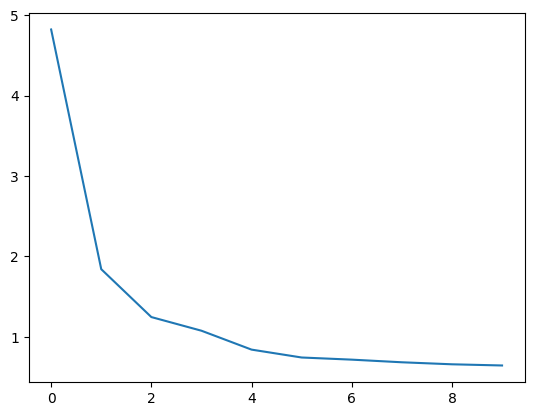

In [32]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.

## 4. Overfitting and Underfitting
Recall from the example in the previous section that Keras will keep a history of the training and validation loss over the epochs that it is training the model. In this lesson, we're going to learn how to interpret these learning curves and how we can use them to guide model development. In particular, we'll examine at the learning curves for evidence of underfitting and overfitting and look at a couple of strategies for correcting it.

### 4.1 Interpreting the Learning Curves
You might think about the information in the training data as being of two kinds: *signal* and *noise*. The signal is the part that generalizes, the part that can help our model make predictions from new data. The noise is that part that is *only* true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.

We train a model by choosing weights or parameters that minimize the loss on a training set. You might know, however, that to accurately assess a model's performance, we need to evaluate it on a new set of data, the *validation* data.

When we train a model we've been plotting the loss on the training set epoch by epoch. To this we'll add a plot of the validation data too. These plots we call the **learning curves**. To train deep learning models effectively, we need to be able to interpret them.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning12.png" alt="Alt text" width="480" height="300">
  </p>
  <figcaption style="text-align: center; font-style: italic;">The validation loss gives an estimate of the expected error on unseen data.</figcaption>
</figure>

Now, the training loss will go down either when the model learns signal or when it learns noise. But the validation loss will go down only when the model learns signal. (Whatever noise the model learned from the training set won't generalize to new data.) So, when a model learns signal both curves go down, but when it learns noise a gap is created in the curves. The size of the gap tells you how much noise the model has learned.

Ideally, we would create models that learn all of the signal and none of the noise. This will practically never happen. Instead we make a trade. We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning13.png" alt="Alt text" width="480" height="300">
  </p>
  <figcaption style="text-align: center; font-style: italic;">Underfitting and overfitting.</figcaption>
</figure>

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*. **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much *noise*. The trick to training deep learning models is finding the best balance between the two.

We'll look at a couple ways of getting more signal out of the training data while reducing the amount of noise.

### 4.1 Capacity
A model's **capacity** refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

You can increase the capacity of a network either by making it *wider* (more units to existing layers) or by making it *deeper* (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

In [33]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(1),
])

wider = Sequential([
    Dense(32, activation='relu'),
    Dense(1),
])

deeper = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

### 4.3 Early Stopping
We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called **early stopping**.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning14.png" alt="Alt text" width="480" height="300">
  </p>
  <figcaption style="text-align: center; font-style: italic;">We keep the model where the validation loss is at a minimum.</figcaption>
</figure>

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent *underfitting* from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

#### Adding Early Stopping
In Keras, we include early stopping in our training through a **callback**. A callback is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has [a variety of useful callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, but you can [define your own](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback), too.)

In [34]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

These parameters say: "*If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found.*" It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.

As we'll see in our example, we'll pass this callback to the `fit` method along with the loss and optimizer.

### 4.4 Example - Train a Model with Early Stopping
Let's continue developing the model from the red wine quality example. We'll increase the capacity of that network but also add an early-stopping callback to prevent overfitting.

Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training once the validation loss shows signs of increasing.

In [35]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = Sequential([
    Dense(512, activation='relu', input_shape=[11]),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


After defining the callback, add it as an argument in `fit` (you can have several, so put it in a list). Choose a large number of epochs when using early stopping, more than you'll need.

Minimum validation loss: 0.47411149740219116


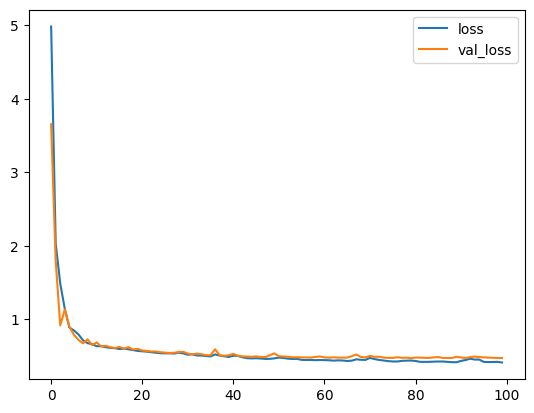

In [36]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

And sure enough, Keras stopped the training well before the full 500 epochs!

#### Model Prediction

In [43]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)
y_pred[:10]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[5.5018687],
       [5.0971284],
       [5.707012 ],
       [5.387818 ],
       [5.7861114],
       [5.301063 ],
       [5.0051723],
       [4.9819574],
       [5.6497464],
       [5.6794395]], dtype=float32)

In [45]:
# Create a DataFrame for with the true quality values and model predictions
df_test = X_test.copy()
df_test['quality'] = y_test
df_test['Predictions'] = y_pred
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predictions
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6,5.501869
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5,5.097128
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6,5.707012
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5,5.387818
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6,5.786111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6,6.104056
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,5,4.805804
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5,5.217603
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6,6.430264


In [48]:
# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.47411149442195893
Mean Squared Error (MSE): 0.36722032496996915
Root Mean Squared Error (RMSE): 0.6059870666688928


We can use our neural network to predict the quality of a new data point.

In [39]:
# Example new data point
new_data = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.7,
    'citric acid': 0.0,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11.0,
    'total sulfur dioxide': 34.0,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame([new_data])

# Scale the new data point
new_data_scaled = scaler.transform(new_data_df)

# Make a prediction
prediction = model.predict(new_data_scaled)

# Print the prediction
print("Prediction for the new data point: {}".format(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for the new data point: [[5.017134]]


## 5. Binary Classification
So far in this course, we've learned about how neural networks can solve regression problems. Now we're going to apply neural networks to another common machine learning problem: classification. Most everything we've learned up until now still applies. The main difference is in the loss function we use and in what kind of outputs we want the final layer to produce.

### 5.1 Binary Classification
Classification into one of two classes is a common machine learning problem. You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease. These are all **binary classification** problems.

In your raw data, the classes might be represented by strings like `"Yes"` and `"No"`, or `"Dog"` and `"Cat"`. Before using this data we'll assign a **class label**: one class will be `0` and the other will be `1`. Assigning numeric labels puts the data in a form a neural network can use.

### 5.2 Accuracy and Cross-Entropy
**Accuracy** is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: `accuracy = number_correct} / total`. A model that always predicted correctly would have an accuracy score of `1.0`. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the *cross-entropy* function.

Now, recall that the loss function defines the *objective* of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between *probabilities*, and this is what cross-entropy provides. **Cross-entropy** is a sort of measure for the distance from one probability distribution to another.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning15.png" alt="Alt text" width="480" height="300">
  </p>
  <figcaption style="text-align: center; font-style: italic;">Cross-entropy penalizes incorrect probability predictions.</figcaption>
</figure>

The idea is that we want our network to predict the correct class with probability `1.0`. The further away the predicted probability is from `1.0`, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

### 5.3 Making Probabilities with the Sigmoid Function
The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the **sigmoid activation**.

<figure>
  <p align="center">
    <img src="imgs/intro_to_deep_learning16.png" alt="Alt text" width="480" height="300">
  </p>
  <figcaption style="text-align: center; font-style: italic;">The sigmoid function maps real numbers into the interval [0, 1].</figcaption>
</figure>

To get the final class prediction, we define a threshold probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras uses by default with its [accuracy metric](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).

### 5.4 Example - Binary Classification
Now let's try it out!

The [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere) dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. The task is to determine whether the signal shows the presence of some object, or just empty air.

In [77]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# Merge DataFrames on index
df = X.join(y)
df.drop('Attribute2', axis=1, inplace=True) # drop the empty feature in column 2
df['Class'] = df['Class'].map({'g': 'good', 'b': 'bad'})
df

,Attribute1,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,good
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,good
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,good
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,good


In [78]:
# Map good/bad to 0/1
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.

In [82]:
model = Sequential([
    Dense(4, activation='relu', input_shape=[33]),
    Dense(4, activation='relu'),    
    Dense(1, activation='sigmoid'),
])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add the cross-entropy loss and accuracy metric to the model with its `compile` method. For two-class problems, be sure to use `'binary'` versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [83]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [84]:
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)

Best Validation Loss: 0.5074
Best Validation Accuracy: 0.7746


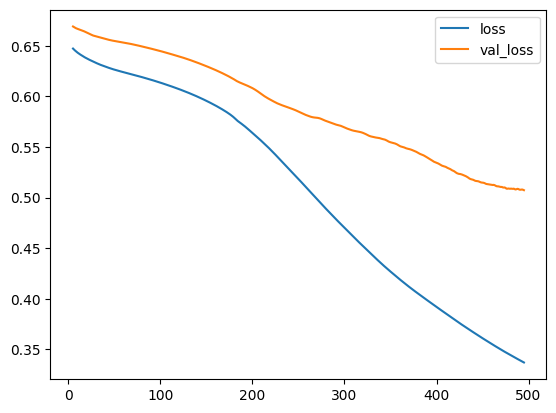

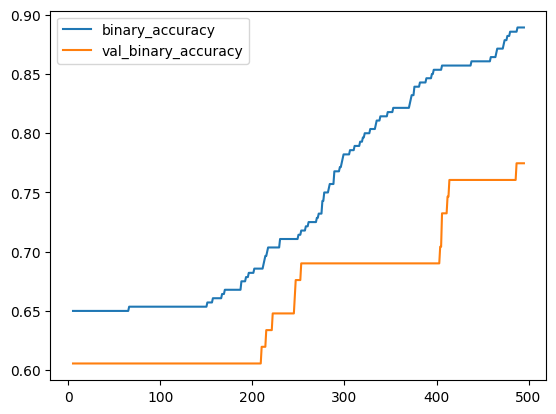

In [85]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))